## Exploratory Data Analysis for Data roles in India


In [1]:
# Importing libraries

import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleaning

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

## Filter for Data Analyst roles in India

In [2]:
df_DA_India = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]

## Visualizing job locations

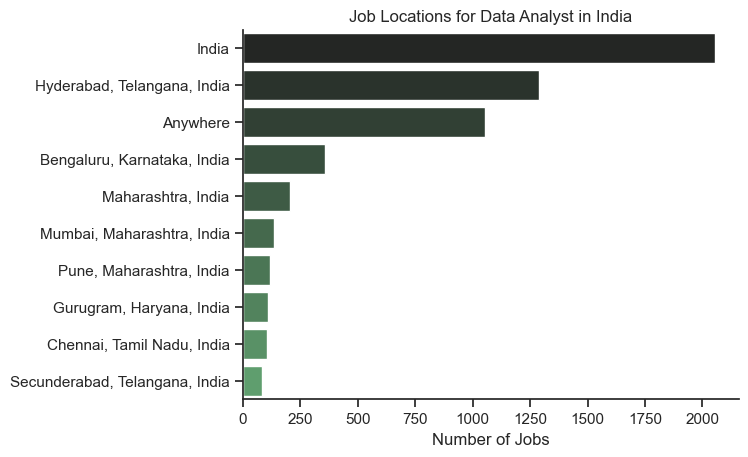

In [3]:
df_plot = df_DA_India['job_location'].value_counts().head(10).to_frame().reset_index()
df_plot.columns = ['job_location', 'count']

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', palette='dark:g')
sns.despine()
plt.title('Job Locations for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Visualizing the requirements and benefits of Data jobs

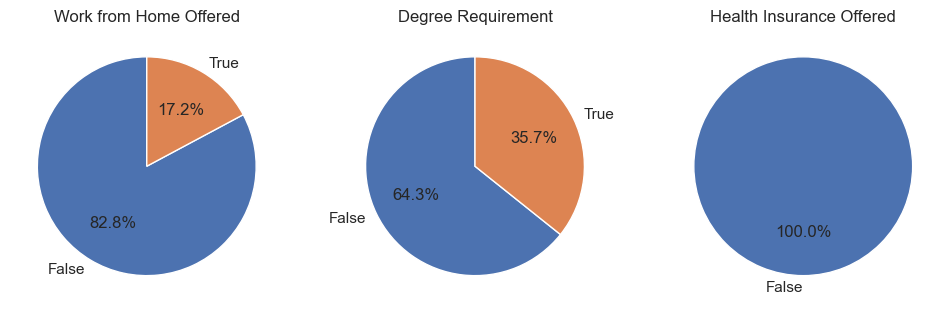

In [4]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_DA_India[column].value_counts()
    labels = value_counts.index.astype(str).tolist()  # Get labels from unique values
    ax[i].pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()


## Visualizing the companies offering Data Analyst jobs

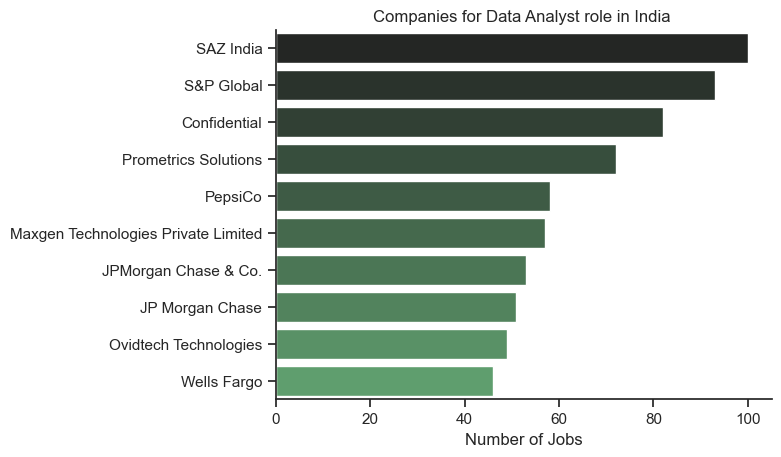

In [5]:
df_plot = df_DA_India['company_name'].value_counts().head(10).to_frame().reset_index()
df_plot.columns = ['company_name','count']

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', palette='dark:g')
sns.despine()
plt.title('Companies for Data Analyst role in India ')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()